In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [4]:
x.shape

(500, 2)

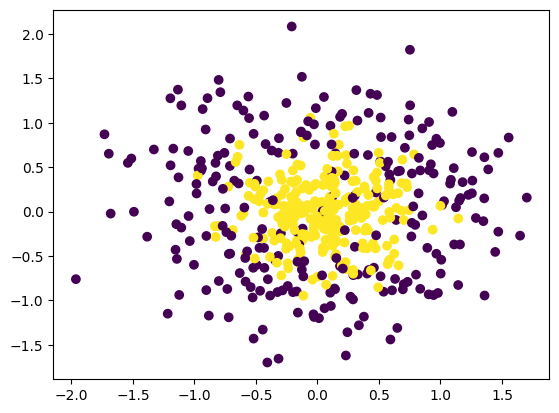

In [5]:
plt.scatter(x[:,0],x[:,1],c=y);

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

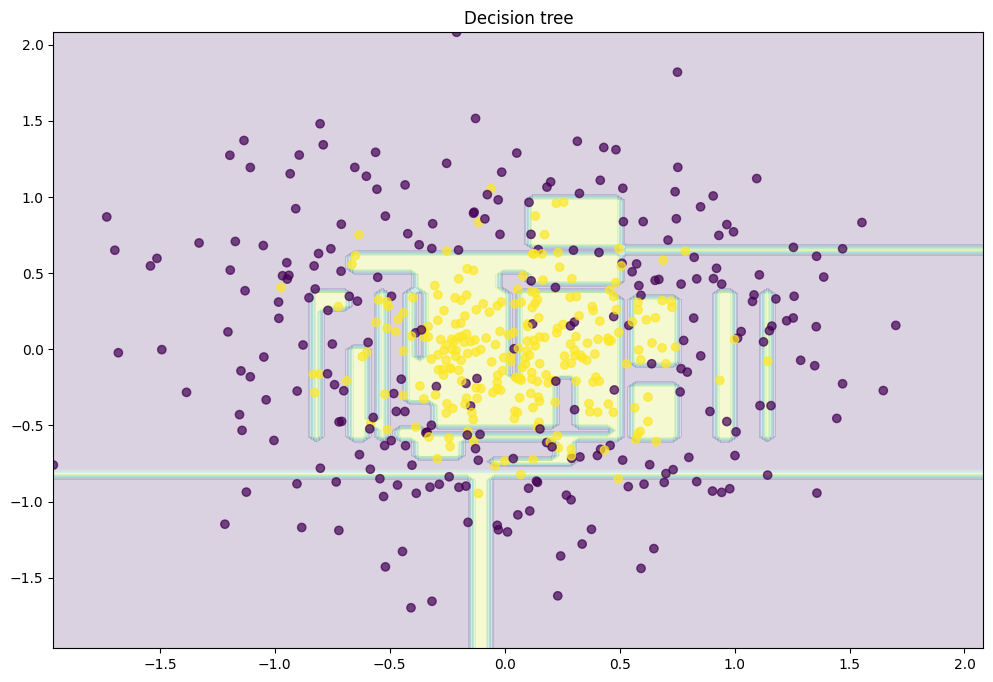

In [9]:
plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.title("Decision tree")
plt.show()

In [10]:
clf.score(x_test,y_test)

0.86

In [11]:
y.min()

0

In [12]:
x[:,0].min(),x[:,1].min()

(-1.963300370196977, -1.6972666214199386)

In [13]:
x.min()

-1.963300370196977

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_clf = RandomForestClassifier()

In [16]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

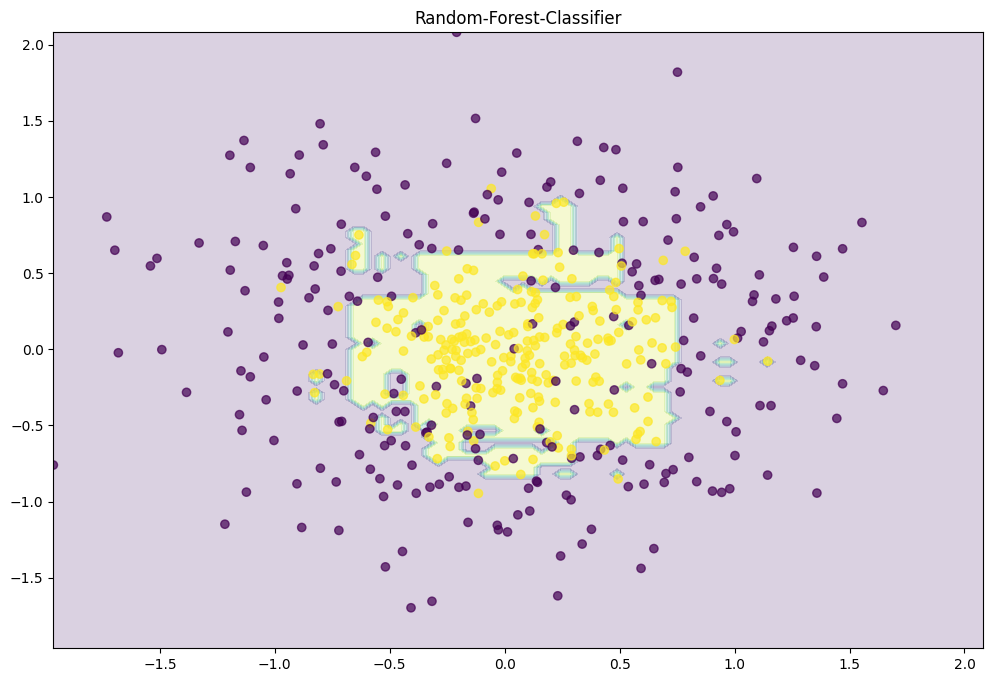

In [18]:
plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = rf_clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.title("Random-Forest-Classifier")
plt.show()

In [20]:
rf_clf.score(x_test,y_test)

0.87

# Now Regression problem

In [22]:
n_train = 150
n_test = 1000
noise =0.1

# Generate data
def f(x):
  x = x.ravel()
  return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generate(n_samples,noise):
  x = np.random.rand(n_samples)*10-5
  x = np.sort(x).ravel()
  y = np.exp(-x**2)+1.5*np.exp(-(x-2)**2)\
  + np.random.normal(0.0,noise,n_samples)
  x = x.reshape((n_samples,1))
  return x,y

In [25]:
x_train,y_train = generate(n_samples=n_train,noise=noise)
x_test,y_test = generate(n_samples=n_test,noise = noise)

(-5.0, 5.0)

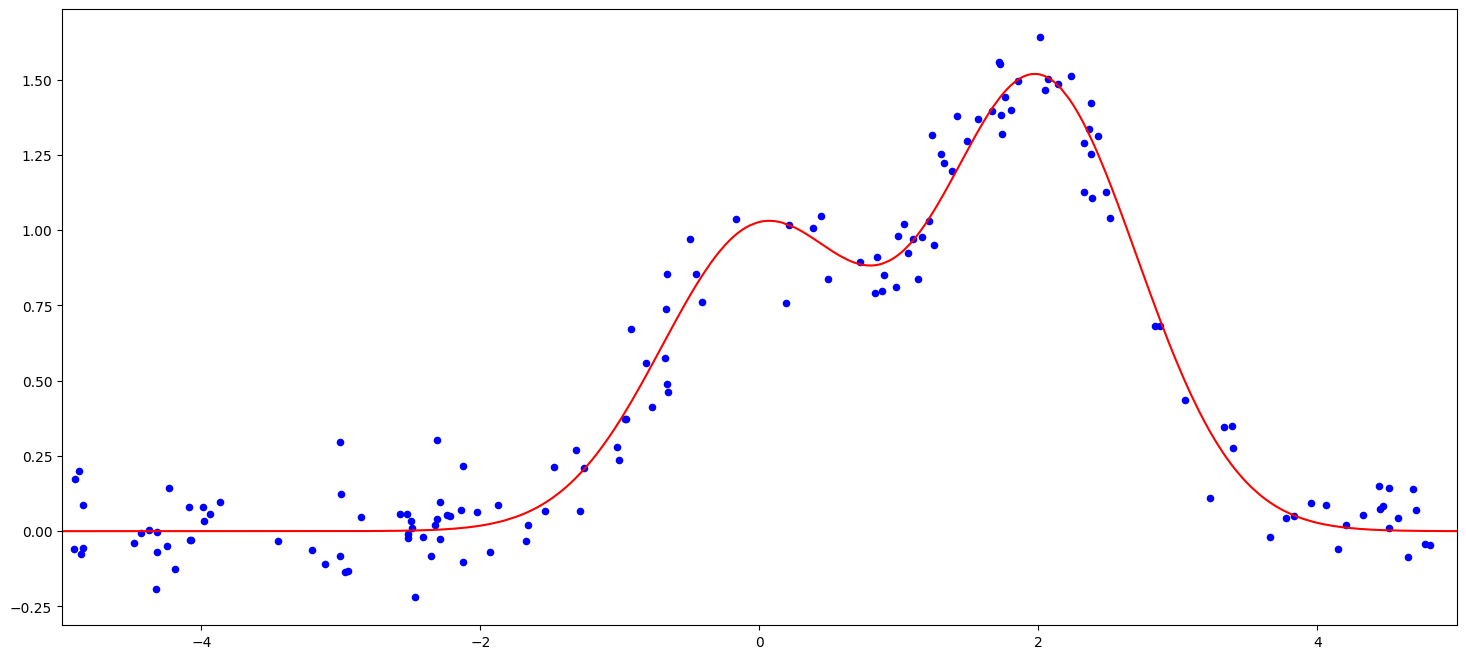

In [26]:
plt.figure(figsize=(18,8))
plt.plot(x_test,f(x_test),"r")
c
plt.xlim([-5,5])

Text(0.5, 1.0, 'Decision tree,MSE = 20.01')

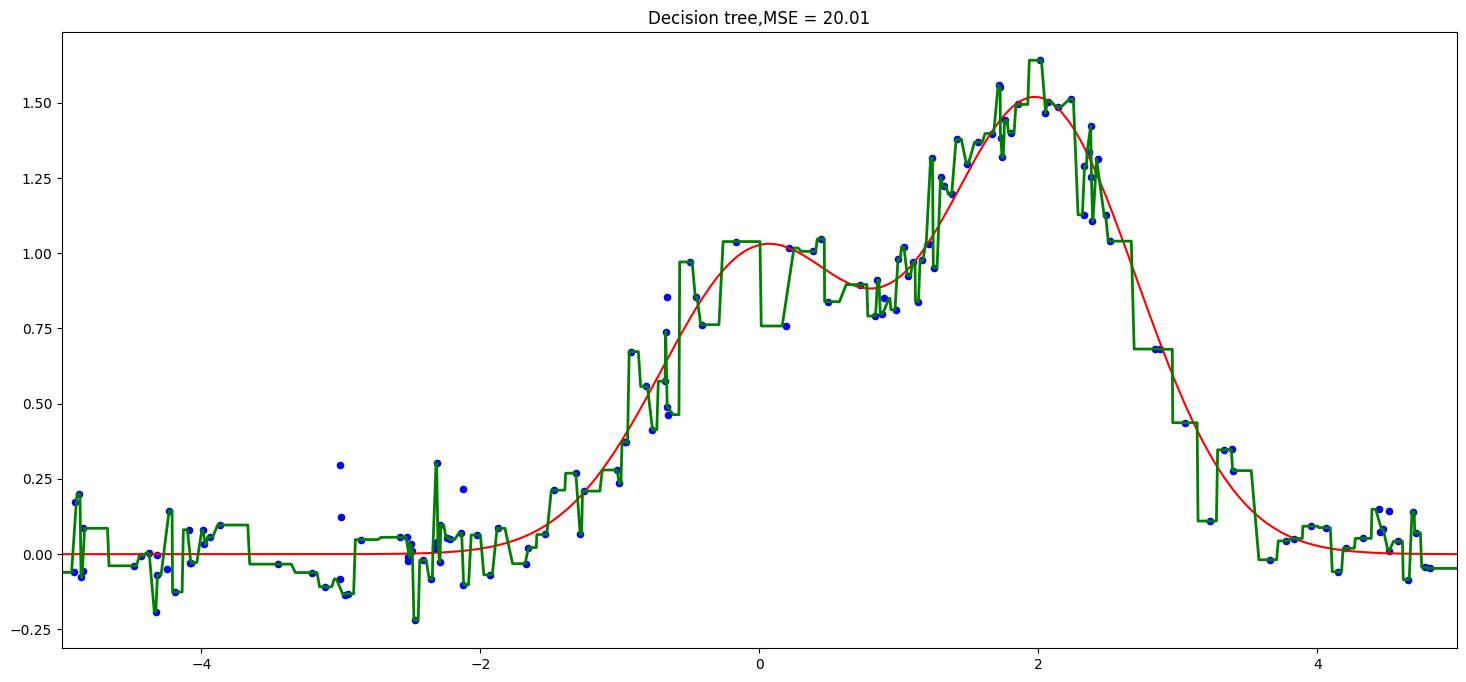

In [28]:
# ONe decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(x_train,y_train)
d_predict = dtree.predict(x_test)

plt.figure(figsize=(18,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c='b',s=20)
plt.plot(x_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decision tree,MSE = %.2f"%np.sum((y_test-d_predict)**2))


Text(0.5, 1.0, 'RandomForestRegressor,MSE = 14.46')

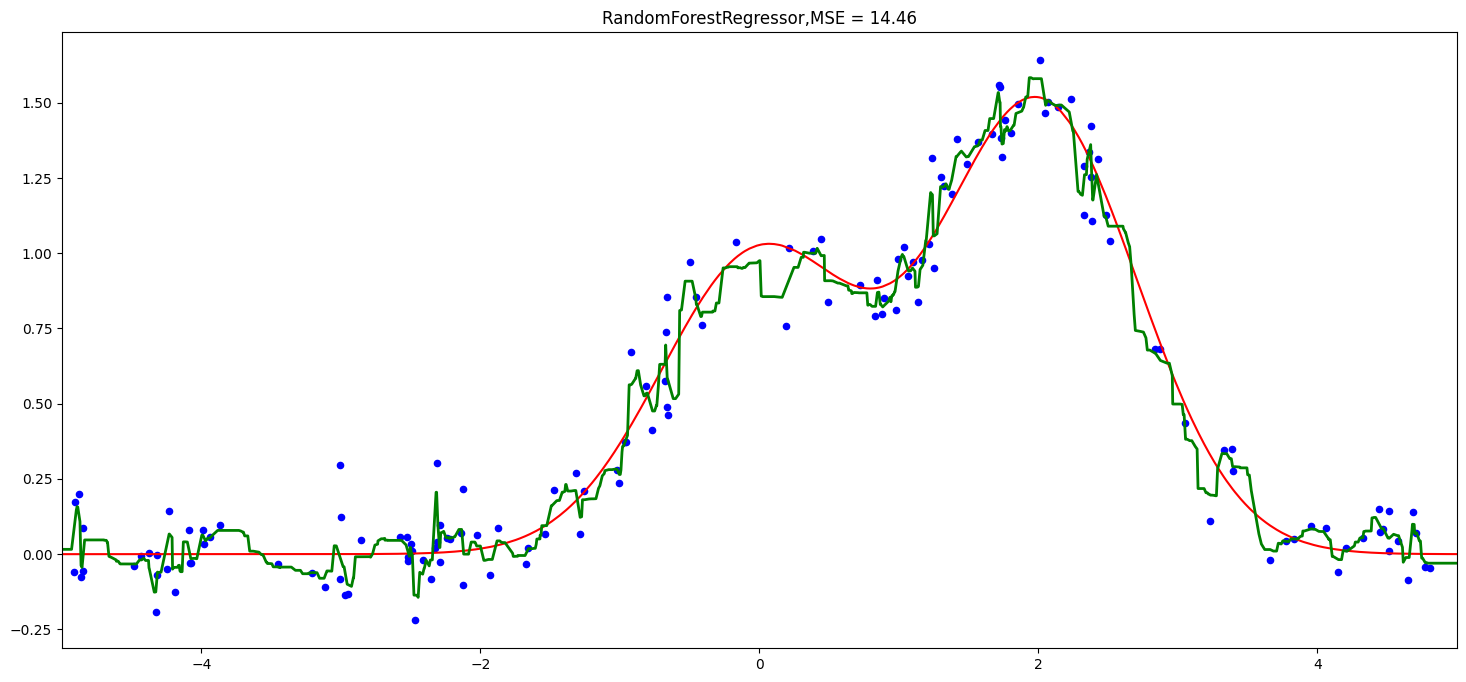

In [30]:
# RandomForest REgressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(x_train,y_train)
rf_predict = rfr.predict(x_test)


plt.figure(figsize=(18,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c='b',s=20)
plt.plot(x_test,rf_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("RandomForestRegressor,MSE = %.2f"%np.sum((y_test-rf_predict)**2))
